In [89]:
import sys
sys.path.append("../src")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sector_specific_sentiment import compute_sector_daily

In [90]:
df = pd.read_csv("../data/preprocessed/headlines/headlines_finbert.csv")
xle_prices = pd.read_csv("../data/preprocessed/etfs/XLE_preprocessed.csv")

In [91]:
print(df.info())
print(xle_prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51122 entries, 0 to 51121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 51122 non-null  object 
 1   Headlines            51122 non-null  object 
 2   Newspaper            51122 non-null  object 
 3   XLE                  51122 non-null  int64  
 4   XLF                  51122 non-null  int64  
 5   XLK                  51122 non-null  int64  
 6   XLV                  51122 non-null  int64  
 7   XLY                  51122 non-null  int64  
 8   positive             51122 non-null  float64
 9   neutral              51122 non-null  float64
 10  negative             51122 non-null  float64
 11  finbert_label        51122 non-null  object 
 12  finbert_confidence   51122 non-null  float64
 13  avg_positive_global  51122 non-null  float64
 14  avg_neutral_global   51122 non-null  float64
 15  avg_negative_global  51122 non-null 

In [92]:
xle_prices["Return_next_day"] = xle_prices["Return"].shift(-1)
xle_prices["Sign_next_day"] = xle_prices["Sign"].shift(-1)
xle_prices.head()

,Date,Price,Return,Sign,Return_next_day,Sign_next_day
0,2018-03-20,47.900124,NaN,NaN,0.026186,1.0
1,2018-03-21,49.154427,0.026186,1.0,-0.020414,-1.0
2,2018-03-22,48.150974,-0.020414,-1.0,-0.006103,-1.0
3,2018-03-23,47.857117,-0.006103,-1.0,0.017972,1.0
4,2018-03-26,48.717216,0.017972,1.0,-0.009416,-1.0


In [93]:
df["Date"] = pd.to_datetime(df["Date"]).dt.normalize()
xle_prices["Date"] = pd.to_datetime(xle_prices["Date"]).dt.normalize()


In [94]:
daily_xle = compute_sector_daily(df, "XLE", min_headlines=1)
daily_xle.head()

,Date,avg_positive_XLE,avg_neutral_XLE,avg_negative_XLE,n_XLE,sent_index_XLE
0,2018-03-20,0.617495,0.364768,0.017737,3,0.599758
1,2018-03-21,0.072957,0.896156,0.030887,2,0.042071
2,2018-03-22,0.088483,0.875179,0.036338,2,0.052145
3,2018-03-23,0.427724,0.518749,0.053528,2,0.374196
4,2018-03-25,0.570338,0.409546,0.020116,1,0.550221


In [95]:
print(df.info())
print(xle_prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51122 entries, 0 to 51121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 51122 non-null  datetime64[ns]
 1   Headlines            51122 non-null  object        
 2   Newspaper            51122 non-null  object        
 3   XLE                  51122 non-null  int64         
 4   XLF                  51122 non-null  int64         
 5   XLK                  51122 non-null  int64         
 6   XLV                  51122 non-null  int64         
 7   XLY                  51122 non-null  int64         
 8   positive             51122 non-null  float64       
 9   neutral              51122 non-null  float64       
 10  negative             51122 non-null  float64       
 11  finbert_label        51122 non-null  object        
 12  finbert_confidence   51122 non-null  float64       
 13  avg_positive_global  51122 non-

In [96]:
merged_xle = xle_prices.merge(daily_xle, on="Date", how="left")
merged_xle.head()


,Date,Price,Return,Sign,Return_next_day,Sign_next_day,avg_positive_XLE,avg_neutral_XLE,avg_negative_XLE,n_XLE,sent_index_XLE
0,2018-03-20,47.900124,NaN,NaN,0.026186,1.0,0.617495,0.364768,0.017737,3.0,0.599758
1,2018-03-21,49.154427,0.026186,1.0,-0.020414,-1.0,0.072957,0.896156,0.030887,2.0,0.042071
2,2018-03-22,48.150974,-0.020414,-1.0,-0.006103,-1.0,0.088483,0.875179,0.036338,2.0,0.052145
3,2018-03-23,47.857117,-0.006103,-1.0,0.017972,1.0,0.427724,0.518749,0.053528,2.0,0.374196
4,2018-03-26,48.717216,0.017972,1.0,-0.009416,-1.0,0.031437,0.548499,0.420064,2.0,-0.388626


In [97]:
data = df.merge(merged_xle, on="Date", how="left")
data.head()

,Date,Headlines,Newspaper,XLE,XLF,XLK,XLV,XLY,positive,neutral,...,Price,Return,Sign,Return_next_day,Sign_next_day,avg_positive_XLE,avg_neutral_XLE,avg_negative_XLE,n_XLE,sent_index_XLE
0,2018-03-20,"Cramer: Trump, the Fed and the cloud can get t...",cnbc,0,0,1,0,0,0.381990,0.606314,...,47.900124,NaN,NaN,0.026186,1.0,0.617495,0.364768,0.017737,3.0,0.599758
1,2018-03-20,G20 financial leaders say need more dialogue o...,reuters,0,0,0,0,0,0.259833,0.077557,...,47.900124,NaN,NaN,0.026186,1.0,0.617495,0.364768,0.017737,3.0,0.599758
2,2018-03-20,Index provider MSCI says it is reviewing Faceb...,reuters,0,0,0,0,0,0.018125,0.884106,...,47.900124,NaN,NaN,0.026186,1.0,0.617495,0.364768,0.017737,3.0,0.599758
3,2018-03-20,UK's Cambridge University questions Facebook a...,reuters,0,0,0,0,0,0.032822,0.651042,...,47.900124,NaN,NaN,0.026186,1.0,0.617495,0.364768,0.017737,3.0,0.599758
4,2018-03-20,"Exclusive: On Amazon, a quarter of merchants' ...",reuters,0,0,0,0,1,0.038724,0.937915,...,47.900124,NaN,NaN,0.026186,1.0,0.617495,0.364768,0.017737,3.0,0.599758


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51122 entries, 0 to 51121
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 51122 non-null  datetime64[ns]
 1   Headlines            51122 non-null  object        
 2   Newspaper            51122 non-null  object        
 3   XLE                  51122 non-null  int64         
 4   XLF                  51122 non-null  int64         
 5   XLK                  51122 non-null  int64         
 6   XLV                  51122 non-null  int64         
 7   XLY                  51122 non-null  int64         
 8   positive             51122 non-null  float64       
 9   neutral              51122 non-null  float64       
 10  negative             51122 non-null  float64       
 11  finbert_label        51122 non-null  object        
 12  finbert_confidence   51122 non-null  float64       
 13  avg_positive_global  51122 non-

In [99]:
data.groupby('Date')['XLE'].sum().describe()

count    851.000000
mean       3.196240
std        3.448483
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       28.000000
Name: XLE, dtype: float64

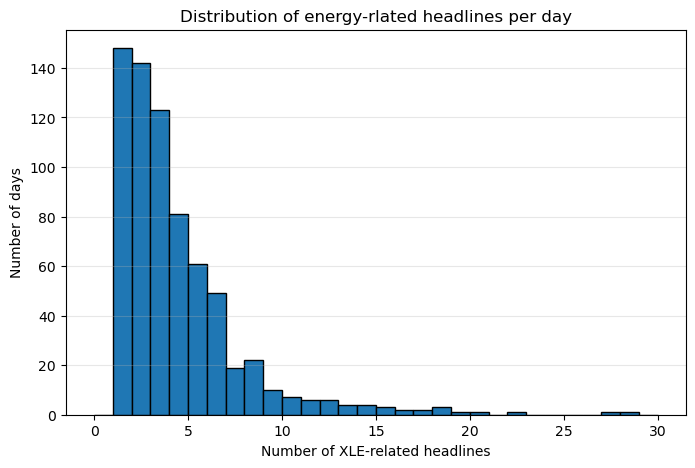

In [100]:
counts = daily_xle["n_XLE"].dropna()

plt.figure(figsize=(8, 5))
plt.hist(counts, bins=range(0, 31), edgecolor="black")
plt.title("Distribution of energy-rlated headlines per day")
plt.xlabel("Number of XLE-related headlines")
plt.ylabel("Number of days")
plt.grid(axis="y", alpha=0.3)
plt.show()


In [101]:
data.head()

,Date,Headlines,Newspaper,XLE,XLF,XLK,XLV,XLY,positive,neutral,...,Price,Return,Sign,Return_next_day,Sign_next_day,avg_positive_XLE,avg_neutral_XLE,avg_negative_XLE,n_XLE,sent_index_XLE
0,2018-03-20,"Cramer: Trump, the Fed and the cloud can get t...",cnbc,0,0,1,0,0,0.381990,0.606314,...,47.900124,NaN,NaN,0.026186,1.0,0.617495,0.364768,0.017737,3.0,0.599758
1,2018-03-20,G20 financial leaders say need more dialogue o...,reuters,0,0,0,0,0,0.259833,0.077557,...,47.900124,NaN,NaN,0.026186,1.0,0.617495,0.364768,0.017737,3.0,0.599758
2,2018-03-20,Index provider MSCI says it is reviewing Faceb...,reuters,0,0,0,0,0,0.018125,0.884106,...,47.900124,NaN,NaN,0.026186,1.0,0.617495,0.364768,0.017737,3.0,0.599758
3,2018-03-20,UK's Cambridge University questions Facebook a...,reuters,0,0,0,0,0,0.032822,0.651042,...,47.900124,NaN,NaN,0.026186,1.0,0.617495,0.364768,0.017737,3.0,0.599758
4,2018-03-20,"Exclusive: On Amazon, a quarter of merchants' ...",reuters,0,0,0,0,1,0.038724,0.937915,...,47.900124,NaN,NaN,0.026186,1.0,0.617495,0.364768,0.017737,3.0,0.599758


In [106]:
data.to_csv("../data/preprocessed/final/xle.csv", index=False)